## Introduction

Bayesian Networks are a very powerful tool to analyze the dependencies within a dataset. While working with them one of the major obstacles is to find wich kind of network structure is the best one. In particular the main goal is to find the most probable network given a certain dataset. The objective of this work is trying to implement an heuristic algorithm, called K2 algorithm, that tries to takle the problem. In particular used in this analysis was proposed in the paper **'A Bayesian Method for the Induction of Probabilistic Networks from Data'** by **G.F.Cooper** and **E.Herskovits**.


The algorithm is firstly coded in R language and than applied to a very simple dataset, the Ruiz Datset, in order to verify its performance. Secondly the algorithm is applied also to two larger datasets in order to see its results on two more complex datasets. An analysis of its time complexity is also presented. Finally the algorithm is also implemented in the bnstruct library.

## Theorethical information about the algorithm

The algorithm is a score based algorithm. The score is used to quantify the probability $P(B_{s},D)$, which is a way to estimate the probability of a network structure $B_{s}$ given a dataset $D$. The algorithm begins by making the assumption that a node $x_i$ has no parents, and then adds incrementally that parent $\pi_i$ whose addition most increases the probability of the resulting structure. When no addition can increase the probability, the algorithm stops adding parents to the node. In this algorithm, then, it is mandatory to set the evaluation order of the nodes, so that it is possible to determine which are the possible parents of each node. For example, given a three node problem with orderering $x_1$,$x_2$,$x_3$, then $x_1$ does not have parents, $x_2$ has $x_1$ as only possible parent and $x_3$ has $x_1$ and $x_2$ as possible parents. The expression of the score for a given node $x_i$ with parents $\pi_i$ is the following:

\begin{equation}
f(i,\pi_i)=\prod_{j=1}^{q_i}\frac{(r_i-1)!}{(N_{ij}+r_i-1)!}\prod_{k=1}^{r_i}\alpha_{ijk}!
\end{equation}

Here the elements of the equation are explained:
- $\pi_i$ = set of parents of node $x_i$
- $\phi_i$ = list of all possible instantiations of the parents of $x_i$ in database D
- $q_i$ = |$\phi_i$|
- $V_i$ = list of possible values of $x_i$
- $r_i$ = |$V_i$|
- $\alpha_{ijk}$ = number of cases (i.e. instances) in D in which the attribute $x_i$ is instantiated with its $k_{th}$ value, and the parents of $x_i$ in $\pi_i$ are instantiated with the $j_{th}$ instantiation in $\phi_i$.
- $N_{ij}$ = $\sum_{k=1}^{r_i}\alpha_{ijk}$ That is, the number of instances in the database in which the parents of $x_i$ in $π_i$ are instantiated with the $j_{th}$ instantiation in $\phi_i$



Tha algorithm is the following:

 ```python
1. procedure K2;
2. # {Input: A set of n nodes, an ordering on the nodes, an upper bound u on the
3. # number of parents a node may have, and a database D containing m cases.}
4. # {Output: For each node, a printout of the parents of the node.}
5. for i:= 1 to n do
6.   𝜋𝑖  := Ø;
7.   P_old := f(i, 𝜋i); #{This function is computed using Equation 7}.
8.   OKToProceed := TRUE;
9.   While OKToProceed and |𝜋i| < u do
10.     let z be the node in Pred(xi) - 𝜋i that maximizes f(i, 𝜋i Ս {z});
11.     P_new := f(i, 𝜋i Ս {z});
12.     if P_new > P_old then
13.       P_old := P_new;
14.       𝜋i := 𝜋i Ս {z};
15.     else OKToProceed := FALSE;
16.   end {while};
17.   write('Node:', xi, 'Parent of xi:', 𝜋i);
18.  end {for};
19. end {K2};
 ```

 ## Our algorithm: the functions

 In order to better explain how our code works, from now the node $x_i$ is called **child**.
The code implmented is based on three functions:

- <code> alpha </code>:

   This function, given a child and a set of parents, returns the factors $\alpha_{ijk}$. It links a combination of values of the parents to a value of the child, and calculates how many times that combination appears in the dataset(the value $\alpha_{ijk}$). Then a vector containing the $\alpha_{ijk}$ calculated is returned. This vector will be converted in a matrix with rows equal to the number of possible values of the child ($r_i$) in the function <code> score_flag </code>.



- <code> score_flag </code>:

    This function take as input a child, a set of parents and the dataset. Its final output is the score assigned to the input. It calculates the factor $N_{ij}$ and calculates the factorial of each element of the matrix of the $\alpha$ values and calculate their product. Once that these two elements are calculated the final score can be calculated. This function has also an *if statement* for the case of the child having no parents, since the calculation of the score is different (and less complicated). Indeed in that case $\pi_i$ is equal to 0 and that would lead to a score equal to 1. But since the score is associated to a probability, this would indicate that for every node the best solution is to have no parents, so when there are no parents the *j* in the formula of the score is ignored. There is also a flag as input of the function: if it is TRUE (default value) the logarithmic version of the score is used since the algorithm can become numerically unstable.


- <code> K2_algorithm </code>:

    This function implements the final K2 algorithm. It take as input the dataset, the maximum number of parents for each child, the order of the nodes and the flag of the function. It prints the correct set of parents for each node, the network score and returns an adjacency matrix. After the network is created, each node has an (even empty) set of parents. To each node with its set of parents can be associated a score through the <code> score_flag </code> function. The network score is calculated as the sum of the logarithms of these scores divided by the number of nodes in the network.

## Levels of the nodes

As already explained, in order to apply the K2 algorithm it is necessary to set the order of the nodes. Normally this order is sequential: if the network has three nodes the ordering consists in first node, the second node and the third node. But there is also another way to set the order. Indeed given a set of nodes is possible to divide them in subsets called levels. The nodes belonging to a specific level have as possible parents the nodes that belong to the previous levels. So basically to each node a number correspondig to its level will be assigned. Then, given a node in the $i^{th}$ level, the algorithm will consider as possible parents the nodes with levels $j<i$.

## Time complexity of the algorithm

In the paper the authors find that given:
- m: number of cases in the dataset D
- n: number of nodes
- r: number of possible values assumed by the nodes
- u: upper bound on the number of parents a node may have

the time complexity of the algorithm is $O(m \ n^2 \ u^2 \ r)$. In this work we will investigate this behaviour by changing the number of cases m and the number of nodes n. 

## Datasets Presentation

Three datasets are used to analyze the performance of the algorithm.

1. **Ruiz Dataset**

The Ruiz dataset is composed by three nodes: $x_1$, $x_2$, $x_3$. Each node value can be 0 or 1. This dataset is composed by 10 cases.

2. **Asia Dataset**

The asia datasets is a toy datasets from the <code>bnstruct</code> library and it investigates the correlations between the following nodes:

- *Asia*: recent visit to Asia
- *Tub*: tuberculosis
- *Smoke*: smoking
- *LungCan*: lung cancer
- *Bronch*: bronchitis
- *Either*: either lung cancer or bronchitis
- *X-ray*: chest X-ray
- *Dysp*: Shortness-of-breath (dyspnoea)

each node can assume two values: 2 means presence, while 1 means absence.

3. **Child Dataset**

The child datasets is a toy datasets from the <code>bnstruct</code> library. The number of nodes is equal to 20 and each one can have multiple values.

In [1]:
#install.packages('bnlearn')
#install.packages('bnstruct')
#install.packages('corrplot')
#install.packages('ggplot2')
#install.packages('network')
#install.packages('GGally')
suppressMessages(library(data.table))
suppressMessages(library(bnstruct))
suppressMessages(library(bnlearn))
suppressMessages(library(corrplot))
suppressMessages(library(ggplot2))
suppressMessages(library(network))
suppressMessages(library(sna))
suppressMessages(library(GGally))
suppressMessages(library(mgcv))

options(repr.plot.width = 7, repr.plot.height = 5)

## Our Algorithm

In [2]:
alpha<-function(child,parent,df){
  
  if(length(parent)==0){
      df_s_p<-df[child]
      alpha<-c(table(df_s_p)) 
  }
  else{
    
    df_s_p <- cbind(df[child],df[parent])
    alpha<-c(table(df_s_p)) # table counts the number of combinations (0,0,0), (0,0,1), ...

  }
    
  return(alpha)  
}

In [3]:
score_flag <- function(child, par, df, flag = TRUE){
    
    r <- length(unique(df[,child]))
    alp <-alpha(child, par, df)
    
    if(length(par)==0){
        
        N <- sum(alp)
        
        if(flag == TRUE){
            
        fact_list <- sapply(alp, lfactorial)
        pr <- sum(fact_list)
        prob <- pr + lfactorial((r-1)) - lfactorial((N + r - 1))

        }

        else{
            
            fact_list <- sapply(alp,factorial)
            pr<-prod(fact_list)
            prob<-pr*factorial((r-1))/factorial((N+r-1))
        }
        
    }
    
    else {
        
        M <- matrix(alp, nrow = r)
        N <- apply(M, 2, sum)

        if(flag == TRUE){
            
            pr_list <- apply(apply(M,c(1,2), lfactorial), 2, sum)
            prob <- 0
            
            for (i in 1:length(N)) {
                #plus <- pr_list[i] + lfactorial(r-1)
                #minus <- lfactorial(N[i]+r-1)
                prob <- prob + pr_list[i] + lfactorial(r-1) - lfactorial(N[i]+r-1)
                }
            
        }
        else{
            
            pr_list <- apply(apply(M, c(1,2), factorial), 2, prod)
            prob <- 1
            
            for (i in 1:length(N)) {      
                #num <- pr_list[i]*factorial(r-1)
                #den <- factorial(N[i]+r-1)
                prob <- prob*pr_list[i]*factorial(r-1)/factorial(N[i]+r-1)

                }
            
        }
  }
  
 return(prob)
  
}

In [4]:
K2_algorithm <- function(df, max_parents, flag = TRUE, order, envir = environment()){
    
    order <- if (missing(order)) 1:ncol(df) else eval(substitute(order), envir)

    n <- ncol(df) #same as length nodes

    if (identical(names(df), NULL)){
        nodes <- sprintf("x%s",seq(1:n))
        colnames(df) <- nodes
    }
    else{
        nodes <- names(df)
    }
    t_order <- data.table(cbind(order, nodes))
    score <- c()
    adj   <- matrix(0, nrow=n, ncol=n)
    rownames(adj) <- nodes
    colnames(adj) <- nodes

        for (i in 1:n){
        
        parent <- c()

        P_old <- score_flag(nodes[i], parent, df, flag)

        ok <- TRUE

        pred_xi <- unlist(t_order$nodes[t_order$order < t_order$order[i]]) #we want the previous nodes, so the ones up to the i-th node
        #idx_pred_xi <- which(colnames(df) == pred_xi) if we want to use numbers instead of names
        
        while (ok & length(parent) < max_parents){ #parent is p_i
            
            diff <- setdiff(pred_xi, parent) #setdiff(idx_pred_xi, parent) if we want to work with indexes instead of names #elements of setdiff(x,y) are those elements in x but not in y, difference is between _sets_
            unions <- lapply(diff, union, parent)
            new_parent <- unlist(unions[which.max(sapply(unions, function(x) score_flag(nodes[i], unlist(x), df, flag)))])
            P_new <- score_flag(nodes[i], new_parent, df, flag)
            
            if (P_new > P_old){
                P_old <- P_new
                parent <- new_parent
            }
                                                         
            else ok <- FALSE      
        }                                            
        
        score <- c(score, P_old)
        adj[i, parent] <- 1
        
        x_i <- t_order$nodes[i]
        if (identical(parent, NULL)) parents_print <- 'None' else parents_print <- parent

        cat('Node:',x_i,'\t\t ------ Parents of node', x_i,'are \t p', x_i, '=',parents_print,'\n')
    }

    
    if (flag) score <- (sum(score)) else score <- log(prod(score))
    cat('Network score :',round(score/nrow(df),3))

    return(adj)
}

### Ruiz dataset

The Ruiz Dataset is the only one of the three analyzed of which we know the correct network structure. Thus it is used in order to check if the algorithm works correctly.

The expected structure is the following:

<img src="ruiz.jpg" width="500" height="300">

In [5]:
data.ruiz  <- data.table(matrix(c(1,0,0,1,1,1,0,0,1,1,1,1,0,0,0,0,1,1,1,1,1,0,0,0,1,1,1,0,0,0), 10,3, byrow=TRUE))
data.ruiz <- as.data.frame(data.ruiz)
nodes <- c('x1','x2','x3')
colnames(data.ruiz) <- nodes

print(data.ruiz)

   x1 x2 x3
1   1  0  0
2   1  1  1
3   0  0  1
4   1  1  1
5   0  0  0
6   0  1  1
7   1  1  1
8   0  0  0
9   1  1  1
10  0  0  0


Now the correlation matrix can be computed, which is used to understand the dependence between multiple variables at the same time. The correlation matrix is shown here in the form of a correlation plot.

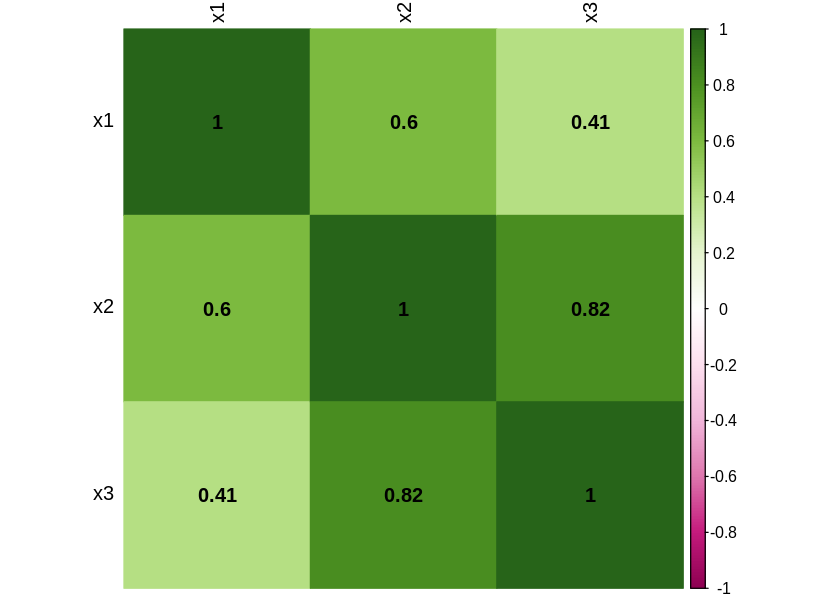

In [6]:
corrplot(cor(data.ruiz), method  = 'color', col = COL2('PiYG'), tl.col = 'black', addCoef.col = 1, order = 'AOE')

**NB** Correlation is a tool to quantify the linear dependency of two variables; however, it cannot capture non-linear relationship between variables.

In [7]:
adj <- K2_algorithm(data.ruiz, 3)
cat('\n')
adj1 <- K2_algorithm(data.ruiz, 3, flag = FALSE)

Node: x1 		 ------ Parents of node x1 are 	 p x1 = None 
Node: x2 		 ------ Parents of node x2 are 	 p x2 = x1 
Node: x3 		 ------ Parents of node x3 are 	 p x3 = x2 
Network score : -1.992
Node: x1 		 ------ Parents of node x1 are 	 p x1 = None 
Node: x2 		 ------ Parents of node x2 are 	 p x2 = x1 
Node: x3 		 ------ Parents of node x3 are 	 p x3 = x2 
Network score : -1.992

Here the resulting net is plotted

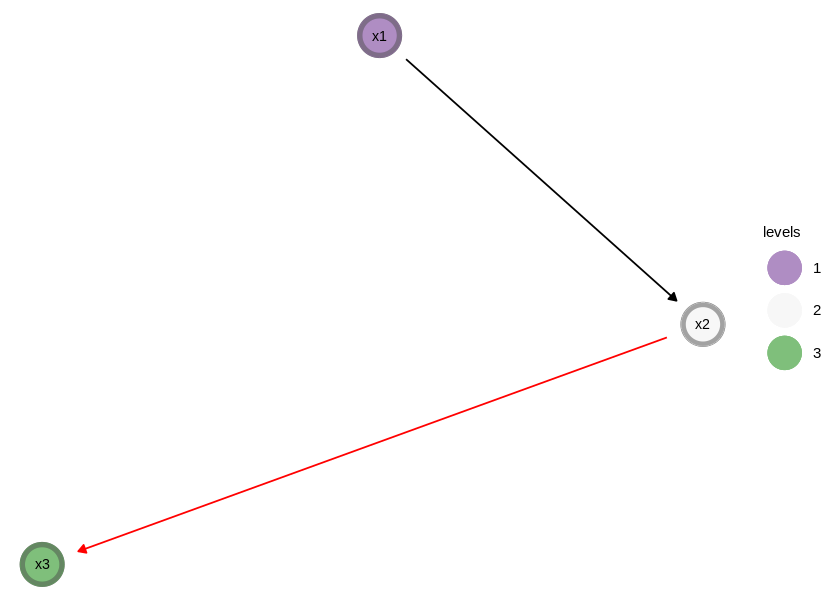

In [8]:
net<-as.network(t(adj))

level<-c(1,2,3)
edge_lev<-c(1,2,3)
net %v% "levels" = level
set.edge.attribute(net, "type",edge_lev)

set.seed(200)
ggnet2(net,color = "levels", palette = 'PRGn',edge.color = 'type',edge.size=0.5, arrow.gap = 0.06, arrow.size = 5, arrow.lty = 100)+
  geom_point(aes(color = color), size = 12, color = "black",alpha=0.7)+
  geom_point(aes(color = color), size = 12, alpha = 0.5)+
  geom_point(aes(color = color), size = 9)+
  geom_text(label=colnames(adj),color='black',size=3)

As it is possible to see from the graph, the algorithm works correctly and it predicts the correct structure

### Asia dataset

Now the results of the Asia dataset are presented.

The exprected structure is the following:

<img src="asia.png" width="500" height="300">

The levels chosen as input in the K2 algorithm function are based on the ones of the expected network

In [9]:
data.asia <- asia()
data.asia


Dataset: 

num.variables 8

variables
Asia Tubercolosys Smoke LungCancer Bronchitis Either X-ray Dyspnea
discreteness
TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
node.sizes
2 2 2 2 2 2 2 2
num.items
10000
imputation
FALSE
has.boots
FALSE
has.imputed.boots
FALSE
num.boots
0

In [10]:
nodes <- c('Asia', 'Tub', 'Smoke', 'LungCan', 'Bronch', 'Either', 'X-ray', 'Dysp')
n <- length(nodes)
asia.real.net <- matrix(0, nrow=n, ncol=n) # matrix which contains the connections of the real net
rownames(asia.real.net) <- nodes
colnames(asia.real.net) <- nodes
asia.real.net['Tub', 'Asia'] <- 1
asia.real.net['LungCan', 'Smoke'] <- 1
asia.real.net['Either', 'Tub'] <- 1
asia.real.net['Either', 'LungCan'] <- 1
asia.real.net['Bronch', 'Smoke'] <- 1
asia.real.net['X-ray', 'Either'] <- 1
asia.real.net['Dysp', 'Either'] <- 1
asia.real.net['Dysp', 'Bronch'] <- 1
asia.real.net

,Asia,Tub,Smoke,LungCan,Bronch,Either,X-ray,Dysp
Asia,0,0,0,0,0,0,0,0
Tub,1,0,0,0,0,0,0,0
Smoke,0,0,0,0,0,0,0,0
LungCan,0,0,1,0,0,0,0,0
Bronch,0,0,1,0,0,0,0,0
Either,0,1,0,1,0,0,0,0
X-ray,0,0,0,0,0,1,0,0
Dysp,0,0,0,0,1,1,0,0


In [11]:
df.asia <- as.data.frame(raw.data(data.asia))
colnames(df.asia) <- nodes
head(df.asia, 20)

Asia,Tub,Smoke,LungCan,Bronch,Either,X-ray,Dysp
2,2,1,1,1,2,1,2
2,1,1,1,1,1,2,1
1,1,2,1,1,1,2,1
2,1,2,1,1,1,2,1
2,1,2,1,1,1,1,2
2,1,2,1,1,1,2,2
2,1,2,1,1,1,2,2
2,1,2,1,1,1,1,2
2,1,2,1,1,1,1,2
2,1,2,1,1,1,2,1


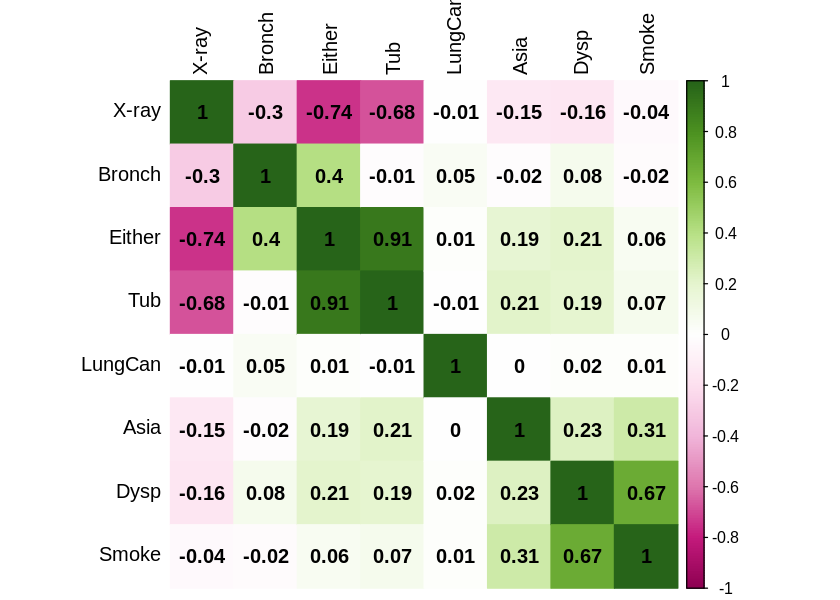

In [12]:
corrplot(cor(df.asia), method  = 'color', col = COL2('PiYG'), tl.col = 'black', addCoef.col = 1, order = 'AOE')

In [13]:
levels <- c(1,2,1,2,3,3,4,4)
asia.alg.net <- K2_algorithm(df.asia, 2, order = levels)
asia.alg.net # matrix which contains the connections found in K2 alg

Node: Asia 		 ------ Parents of node Asia are 	 p Asia = None 
Node: Tub 		 ------ Parents of node Tub are 	 p Tub = Asia 
Node: Smoke 		 ------ Parents of node Smoke are 	 p Smoke = None 
Node: LungCan 		 ------ Parents of node LungCan are 	 p LungCan = None 
Node: Bronch 		 ------ Parents of node Bronch are 	 p Bronch = LungCan 
Node: Either 		 ------ Parents of node Either are 	 p Either = LungCan Tub 
Node: X-ray 		 ------ Parents of node X-ray are 	 p X-ray = Either 
Node: Dysp 		 ------ Parents of node Dysp are 	 p Dysp = Either Smoke 
Network score : -2.356

,Asia,Tub,Smoke,LungCan,Bronch,Either,X-ray,Dysp
Asia,0,0,0,0,0,0,0,0
Tub,1,0,0,0,0,0,0,0
Smoke,0,0,0,0,0,0,0,0
LungCan,0,0,0,0,0,0,0,0
Bronch,0,0,0,1,0,0,0,0
Either,0,1,0,1,0,0,0,0
X-ray,0,0,0,0,0,1,0,0
Dysp,0,0,1,0,0,1,0,0


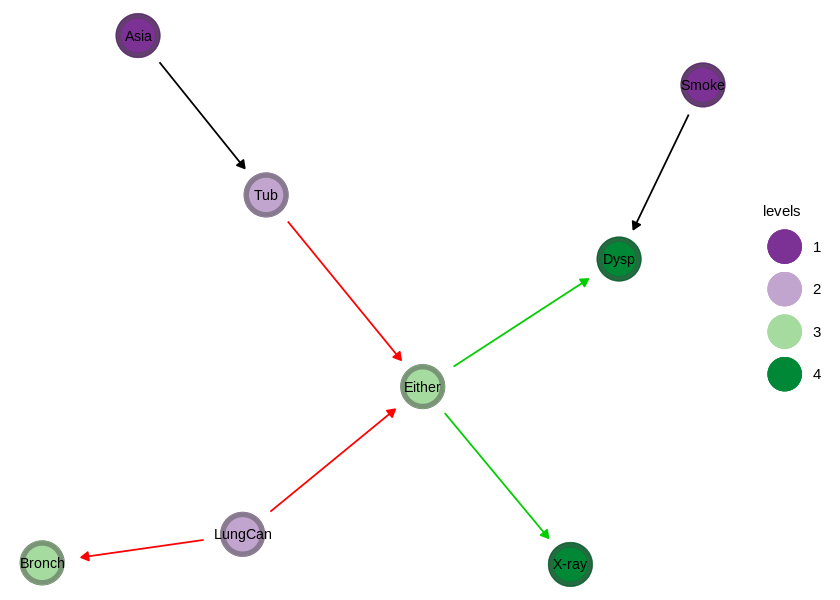

In [14]:
net<-as.network(t(asia.alg.net))

level<-c(1,2,1,2,3,3,4,4)
edge_lev<-c(1,2,2,2,3,1,3)
net %v% "levels" = level
set.edge.attribute(net, "type",edge_lev)

set.seed(200)
ggnet2(net,color = "levels", palette = 'PRGn',edge.color = 'type',edge.size=0.5, arrow.gap = 0.06, arrow.size = 5, arrow.lty = 100)+
  geom_point(aes(color = color), size = 12, color = "black",alpha=0.7)+
  geom_point(aes(color = color), size = 12, alpha = 0.5)+
  geom_point(aes(color = color), size = 9)+
  geom_text(label=colnames(asia.alg.net),color='black',size=3)

A way to jugde the performances in the prediction of the network is the following. Given a proposal net and a reference one, two quantities can be evaluated:

- The number of correctly predicted edges
- The number of wrong edges (missing or added)

Following this [reference](https://www.sciencedirect.com/science/article/pii/S131915782030392X) one can set as accuracy score:

$accuracy = \frac{correct\ edges}{correct\ edges\ +\ wrong\ edges}$

It has to be noticed that in this way reversed edges are penalized twice (they are both missing and added).

In [15]:
accuracy <- function(proposal.net, real.net) { # accuracy of a proposal net respect to a real net
  tot.arcs <- sum(real.net)
  diff <- proposal.net-real.net
  mult <- proposal.net*real.net
  rev <- t(proposal.net)*real.net
  correct.arcs <- length(mult[mult == 1])
  missing.arcs <- length(diff[diff == -1])
  added.arcs <- length(diff[diff == 1])
  wrong.arcs <- length(diff[diff != 0])
  reversed.arcs <- length(rev[rev == 1])
  acc <- (correct.arcs/(correct.arcs+wrong.arcs))
  cat('Number of correct edges:', correct.arcs, '\n')
  cat('Number of missing edges:', missing.arcs, '\n')
  cat('Number of added edges:', added.arcs, '\n')
  cat('Number of reversed edges:', reversed.arcs, '\n')
  cat('Accuracy:', acc, '\n')
}

In [16]:
accuracy(asia.alg.net, asia.real.net)

Number of correct edges: 5 
Number of missing edges: 3 
Number of added edges: 2 
Number of reversed edges: 0 
Accuracy: 0.5 


As it possible to see from the accuracy of the network and the resulting graph the final predicted structure is not the one expected

### Result without levels

In [17]:
asia.alg.net <- K2_algorithm(df.asia, 2)
asia.alg.net # matrix which contains the connections found in K2 alg

Node: Asia 		 ------ Parents of node Asia are 	 p Asia = None 
Node: Tub 		 ------ Parents of node Tub are 	 p Tub = Asia 
Node: Smoke 		 ------ Parents of node Smoke are 	 p Smoke = Asia 
Node: LungCan 		 ------ Parents of node LungCan are 	 p LungCan = None 
Node: Bronch 		 ------ Parents of node Bronch are 	 p Bronch = LungCan 
Node: Either 		 ------ Parents of node Either are 	 p Either = Bronch Tub 
Node: X-ray 		 ------ Parents of node X-ray are 	 p X-ray = Either 
Node: Dysp 		 ------ Parents of node Dysp are 	 p Dysp = Either Smoke 
Network score : -2.248

,Asia,Tub,Smoke,LungCan,Bronch,Either,X-ray,Dysp
Asia,0,0,0,0,0,0,0,0
Tub,1,0,0,0,0,0,0,0
Smoke,1,0,0,0,0,0,0,0
LungCan,0,0,0,0,0,0,0,0
Bronch,0,0,0,1,0,0,0,0
Either,0,1,0,0,1,0,0,0
X-ray,0,0,0,0,0,1,0,0
Dysp,0,0,1,0,0,1,0,0


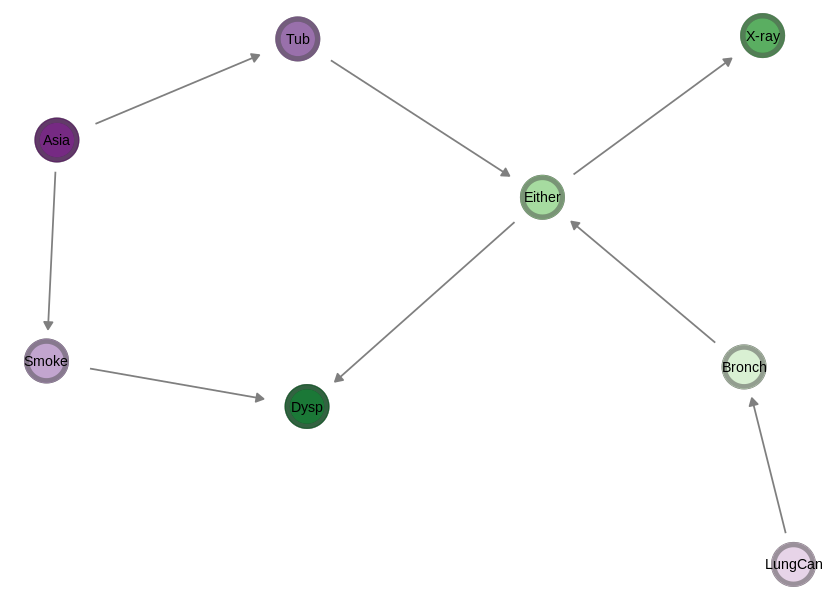

In [18]:
net<-as.network(t(asia.alg.net))

set.seed(200)
ggnet2(net,color = c(1,2,3,4,5,6,7,8), palette = 'PRGn',edge.size=0.5, arrow.gap = 0.06, arrow.size = 5, arrow.lty = 100)+
  geom_point(aes(color = color), size = 12, color = "black",alpha=0.7)+
  geom_point(aes(color = color), size = 12, alpha = 0.5)+
  geom_point(aes(color = color), size = 9)+
  geom_text(label=colnames(asia.alg.net),color='black',size=3)+
  guides(color = 'none')

In [19]:
accuracy(asia.alg.net, asia.real.net)

Number of correct edges: 4 
Number of missing edges: 4 
Number of added edges: 4 
Number of reversed edges: 0 
Accuracy: 0.3333333 


## Child dataset

Here the results on the child dataset are presented.

The expected structure is the following:

<img src="child.png" width="500" height="300">

The levels put as input in the K2 algorithm function are based on the ones of the expected network

In [20]:
data.child <- child()
data.child <- bnstruct::impute(data.child)
data.child.imp <-imputed.data(data.child)
data.child.imp <- as.data.frame(data.child.imp)
nodes <- c('BA', 'DIS', 'AGE', 'LVH', 'DF', 'CM', 'LP', 'LF', 'S', 'HD',
           'HO2', 'CO2', 'CXR', 'G', 'LVHR', 'LBO2', 'RUQO2', 'CO2R', 'XRR', 'GR')
colnames(data.child.imp) <- nodes
head(data.child.imp, 20)

bnstruct :: performing imputation ...
bnstruct :: imputation finished.


BA,DIS,AGE,LVH,DF,CM,LP,LF,S,HD,HO2,CO2,CXR,G,LVHR,LBO2,RUQO2,CO2R,XRR,GR
2,3,3,2,1,3,1,1,2,1,1,1,1,2,2,2,3,2,1,2
2,4,2,1,1,2,1,2,2,1,2,1,2,2,1,2,2,1,2,2
2,3,1,2,1,3,1,2,2,1,2,2,2,2,2,1,2,1,2,2
2,4,1,1,1,3,1,1,2,1,3,1,1,2,1,3,1,1,1,2
2,2,1,2,2,4,1,1,1,1,3,1,1,2,2,1,1,1,2,2
2,2,1,2,1,4,1,3,2,1,3,1,3,2,2,2,1,1,3,2
2,2,1,2,2,4,1,3,2,1,3,1,1,2,2,1,1,1,1,2
2,1,1,2,3,1,1,1,2,2,2,1,4,2,2,1,1,1,4,2
2,3,2,2,1,3,1,2,2,1,2,1,2,2,2,1,1,1,2,2
2,4,1,1,1,3,1,2,2,1,3,3,2,2,1,1,1,2,2,2


In [21]:
n <- length(nodes)
child.real.net <- matrix(0, nrow=n, ncol=n) # matrix which contains the connections of the real net
rownames(child.real.net) <- nodes
colnames(child.real.net) <- nodes
child.real.net['DIS', 'BA'] <- 1
child.real.net['S', 'DIS'] <- 1
child.real.net['DF', 'DIS'] <- 1
child.real.net['CM', 'DIS'] <- 1
child.real.net['LP', 'DIS'] <- 1
child.real.net['LF', 'DIS'] <- 1
child.real.net['LVH', 'DIS'] <- 1
child.real.net['AGE', 'DIS'] <- 1
child.real.net['AGE', 'S'] <- 1
child.real.net['G', 'S'] <- 1
child.real.net['G', 'LP'] <- 1
child.real.net['HD', 'DF'] <- 1
child.real.net['HD', 'CM'] <- 1
child.real.net['HO2', 'CM'] <- 1
child.real.net['HO2', 'LP'] <- 1
child.real.net['CO2', 'LP'] <- 1
child.real.net['CXR', 'LP'] <- 1
child.real.net['CXR', 'LF'] <- 1
child.real.net['LVHR', 'LVH'] <- 1
child.real.net['GR', 'G'] <- 1
child.real.net['LBO2', 'HD'] <- 1
child.real.net['LBO2', 'HO2'] <- 1
child.real.net['RUQO2', 'HO2'] <- 1
child.real.net['CO2R', 'CO2'] <- 1
child.real.net['XRR', 'CXR'] <- 1
child.real.net

,BA,DIS,AGE,LVH,DF,CM,LP,LF,S,HD,HO2,CO2,CXR,G,LVHR,LBO2,RUQO2,CO2R,XRR,GR
BA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
DIS,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AGE,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
LVH,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
DF,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
CM,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LP,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LF,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
S,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
HD,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


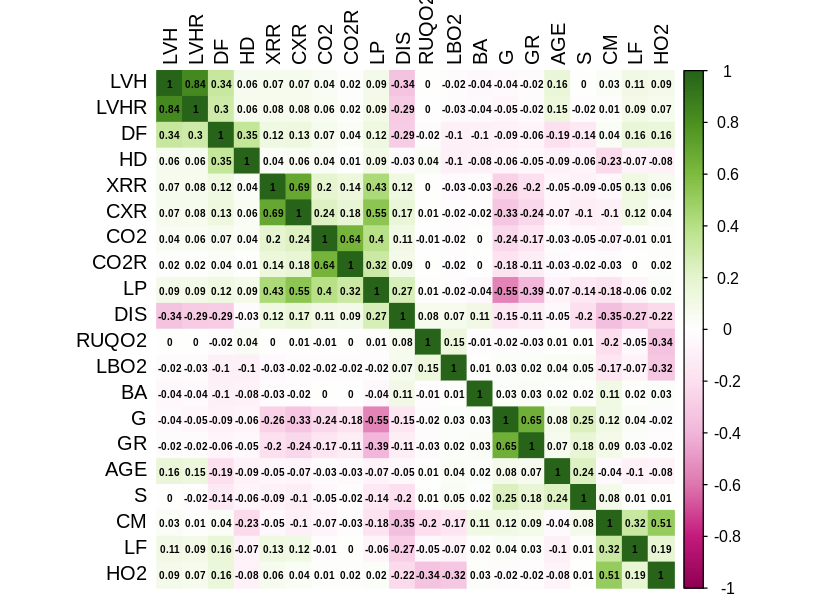

In [22]:
corrplot(cor(data.child.imp), method  = 'color', col = COL2('PiYG'), tl.col = 'black', addCoef.col = 1, number.cex = 0.5, order = 'AOE')

In [23]:
level <- c(1,2,4,3,3,3,3,3,3,4,4,4,4,4,4,5,5,5,5,5)
child.alg.net <- K2_algorithm(data.child.imp, 2, order = level) # matrix which contains the connections found in K2 alg

Node: BA 		 ------ Parents of node BA are 	 p BA = None 
Node: DIS 		 ------ Parents of node DIS are 	 p DIS = BA 
Node: AGE 		 ------ Parents of node AGE are 	 p AGE = S DIS 
Node: LVH 		 ------ Parents of node LVH are 	 p LVH = DIS 
Node: DF 		 ------ Parents of node DF are 	 p DF = DIS 
Node: CM 		 ------ Parents of node CM are 	 p CM = DIS 
Node: LP 		 ------ Parents of node LP are 	 p LP = DIS 
Node: LF 		 ------ Parents of node LF are 	 p LF = DIS 
Node: S 		 ------ Parents of node S are 	 p S = DIS 
Node: HD 		 ------ Parents of node HD are 	 p HD = CM DF 
Node: HO2 		 ------ Parents of node HO2 are 	 p HO2 = LP CM 
Node: CO2 		 ------ Parents of node CO2 are 	 p CO2 = LP 
Node: CXR 		 ------ Parents of node CXR are 	 p CXR = LP LF 
Node: G 		 ------ Parents of node G are 	 p G = S LP 
Node: LVHR 		 ------ Parents of node LVHR are 	 p LVHR = DIS LVH 
Node: LBO2 		 ------ Parents of node LBO2 are 	 p LBO2 = HD HO2 
Node: RUQO2 		 ------ Parents of node RUQO2 are 	 p RUQO2 = HO2 


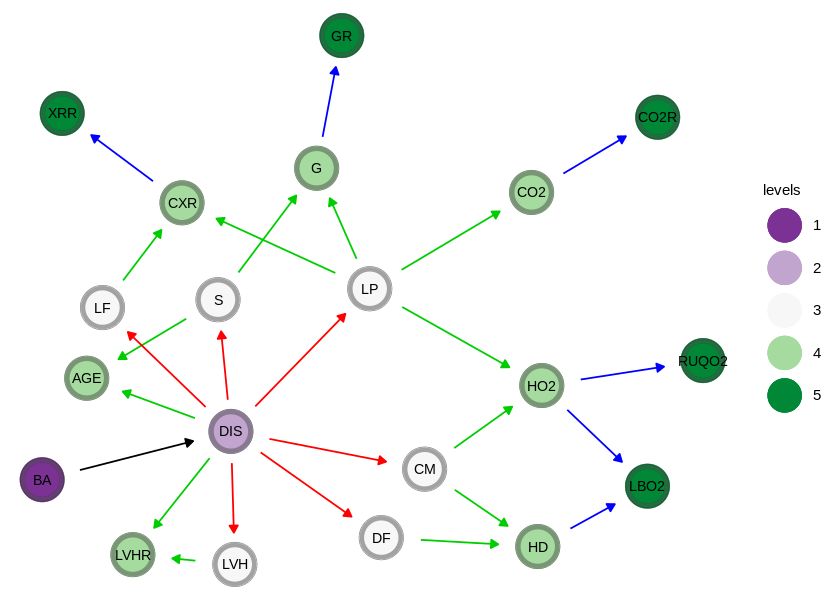

In [24]:
net<-as.network(t(child.alg.net))


edge_lev<-c(1,3,3,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4)
net %v% "levels" = level
set.edge.attribute(net, "type",edge_lev)

set.seed(200)
ggnet2(net,color = "levels", palette = 'PRGn',edge.color = 'type',edge.size=0.5, arrow.gap = 0.06, arrow.size = 5, arrow.lty = 100)+
  geom_point(aes(color = color), size = 12, color = "black",alpha=0.7)+
  geom_point(aes(color = color), size = 12, alpha = 0.5)+
  geom_point(aes(color = color), size = 9)+
  geom_text(label=colnames(child.alg.net),color='black',size=3)

In [25]:
accuracy(child.alg.net, child.real.net)

Number of correct edges: 25 
Number of missing edges: 0 
Number of added edges: 1 
Number of reversed edges: 0 
Accuracy: 0.9615385 


It can be observed that our algorithm predicts only one wrong edge, the one connecting DIS to LVHR, which is missing in the original network. Accordingly, the accuracy value is high.

### Result without levels

In [26]:
child.alg.net <- K2_algorithm(data.child.imp, 2)

Node: BA 		 ------ Parents of node BA are 	 p BA = None 
Node: DIS 		 ------ Parents of node DIS are 	 p DIS = LVHR CXR 
Node: AGE 		 ------ Parents of node AGE are 	 p AGE = DIS 
Node: LVH 		 ------ Parents of node LVH are 	 p LVH = DIS LVHR 
Node: DF 		 ------ Parents of node DF are 	 p DF = HD DIS 
Node: CM 		 ------ Parents of node CM are 	 p CM = HO2 DIS 
Node: LP 		 ------ Parents of node LP are 	 p LP = DIS CXR 
Node: LF 		 ------ Parents of node LF are 	 p LF = DIS CXR 
Node: S 		 ------ Parents of node S are 	 p S = AGE DIS 
Node: HD 		 ------ Parents of node HD are 	 p HD = BA 
Node: HO2 		 ------ Parents of node HO2 are 	 p HO2 = BA HD 
Node: CO2 		 ------ Parents of node CO2 are 	 p CO2 = None 
Node: CXR 		 ------ Parents of node CXR are 	 p CXR = CO2 HO2 
Node: G 		 ------ Parents of node G are 	 p G = CO2 CXR 
Node: LVHR 		 ------ Parents of node LVHR are 	 p LVHR = HO2 CXR 
Node: LBO2 		 ------ Parents of node LBO2 are 	 p LBO2 = HD HO2 
Node: RUQO2 		 ------ Parents of 

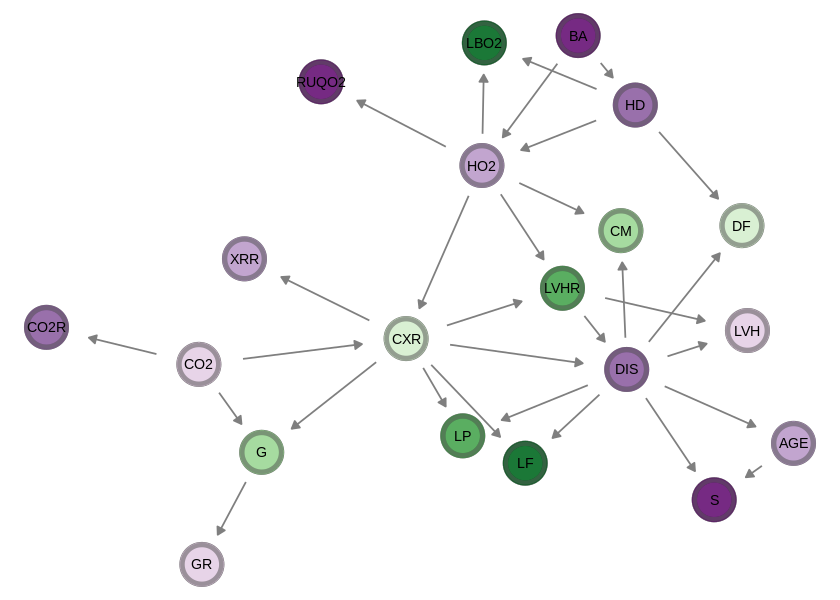

In [27]:
net<-as.network(t(child.alg.net))

col<-c(3,4,5,6,7,8,9,10,3,4,5,6,7,8,9,10,3,4,5,6)

set.seed(200)
ggnet2(net,color = col, palette = 'PRGn',edge.size=0.5, arrow.gap = 0.06, arrow.size = 5, arrow.lty = 100)+
  geom_point(aes(color = color), size = 12, color = "black",alpha=0.7)+
  geom_point(aes(color = color), size = 12, alpha = 0.5)+
  geom_point(aes(color = color), size = 9)+
  geom_text(label=colnames(child.alg.net),color='black',size=3)+
  guides(color = 'none')

In [28]:
accuracy(child.alg.net, child.real.net)

Number of correct edges: 13 
Number of missing edges: 12 
Number of added edges: 17 
Number of reversed edges: 6 
Accuracy: 0.3095238 


### Timing

In [29]:
eval_time <- function(f){
    start_time <- Sys.time()
    invisible(capture.output(f))
    end_time <- Sys.time()
    return(end_time - start_time)
}

plot_data_nrows <- function(df.data, seq_data, flag_log = TRUE){

  seq_data <- seq(from = 100, to = nrow(df.data), by = 100)

  n <- length(seq_data)
  times <- c()
  pb <- txtProgressBar(0, n, style = 3)

  for (i in 1:n){

    setTxtProgressBar(pb, i)
    times <- c(times, as.numeric(eval_time(K2_algorithm(df.data[1:seq_data[i],], 2, flag_log))))
    }

    close(pb)

    df_times <- data.frame(seq_data, times)

    df_model <- lm(times ~ seq_data, data = df_times)

    g <- ggplot(df_times, aes(x=seq_data, y = times)) + geom_point(color='darkcyan', size = 1) + stat_smooth(method='lm', formula = y ~ x, size = 0.5, col = 'blue') +
    labs(title=paste('Computation time for K2 as a function of the number of cases', ifelse(flag_log, ' using log', ' not using log'), sep = ''),
    subtitle = paste('y =  ', round(df_model$coef[[1]],5) , ' + ', round(df_model$coef[[2]],5),' x ', sep = ''), x='Number of cases', y='time (s)') + theme_bw()
    
    g
  
}

plot_data_ncolumns <- function(df.data, flag_log = TRUE){

  n <- ncol(df.data)
  times <- c()
  pb <- txtProgressBar(0, n, style = 3)

  for (i in 2:ncol(df.data)){

    setTxtProgressBar(pb, i)
    times <- c(times, as.numeric(eval_time(K2_algorithm(df.data[,1:i], 2, flag_log))))
    }

    close(pb)

    df_times <- data.frame(seq(2,n), times)

    df_model <- lm(times ~ poly(seq(2,n),2), data = df_times)

    g <- ggplot(df_times, aes(x=seq(2,n), y = times)) + geom_point(color='darkcyan', size = 1) + stat_smooth(method='lm', formula = y ~ poly(x,2), size = 0.5, col = 'blue') +
    labs(title=paste('Computation time for K2 as a function of the number of nodes', ifelse(flag_log, ' using log', ' not using log'), sep = ''),
    subtitle = paste('y = ', round(df_model$coef[[1]],5), ' + ', round(df_model$coef[[2]],5),'x + ', round(df_model$coef[[3]],5), 'x^2', sep = ''), x='Number of nodes', y='time (s)') + theme_bw()
    
    g
  
}

### Asia Dataset

  |======================================================================| 100%
  |======================================================================| 100%


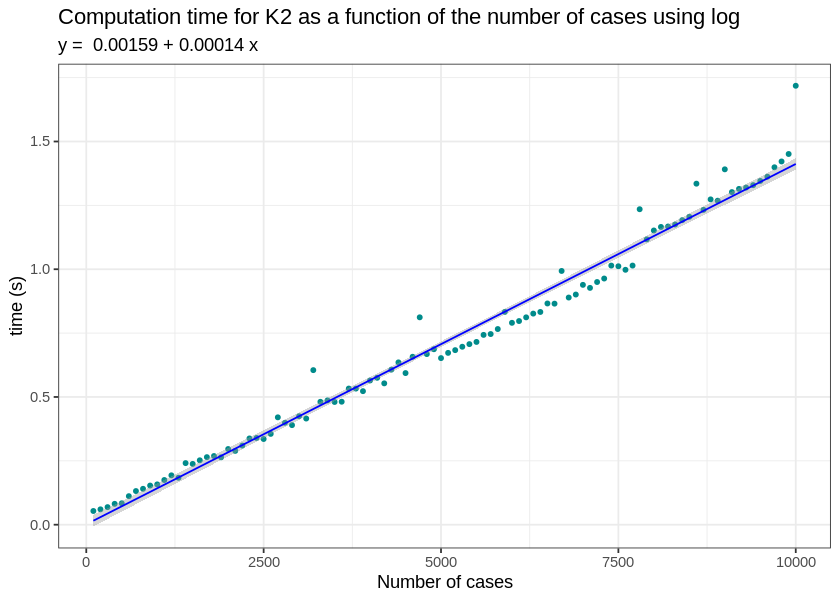

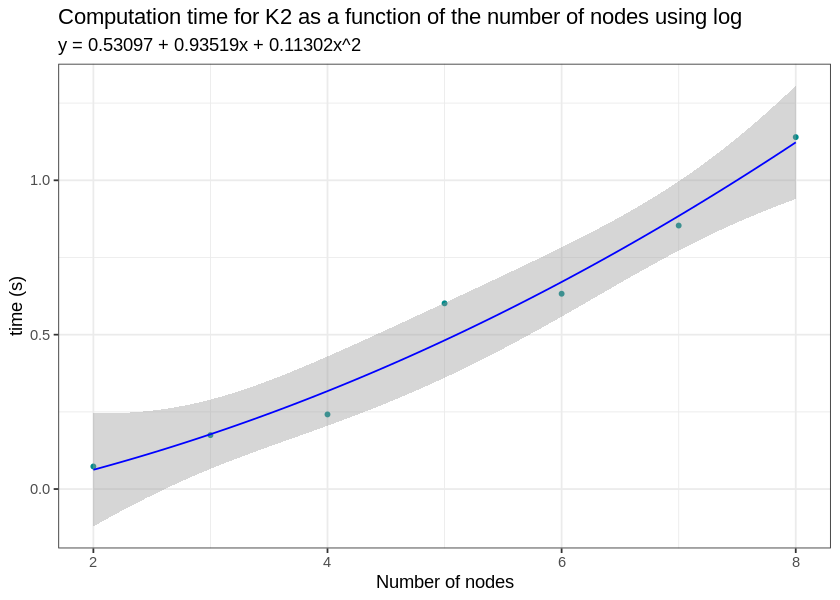

In [30]:
plot_data_nrows(df.asia)
plot_data_ncolumns(df.asia)

### Child Dataset

  |======================================================================| 100%
  |======================================================================| 100%


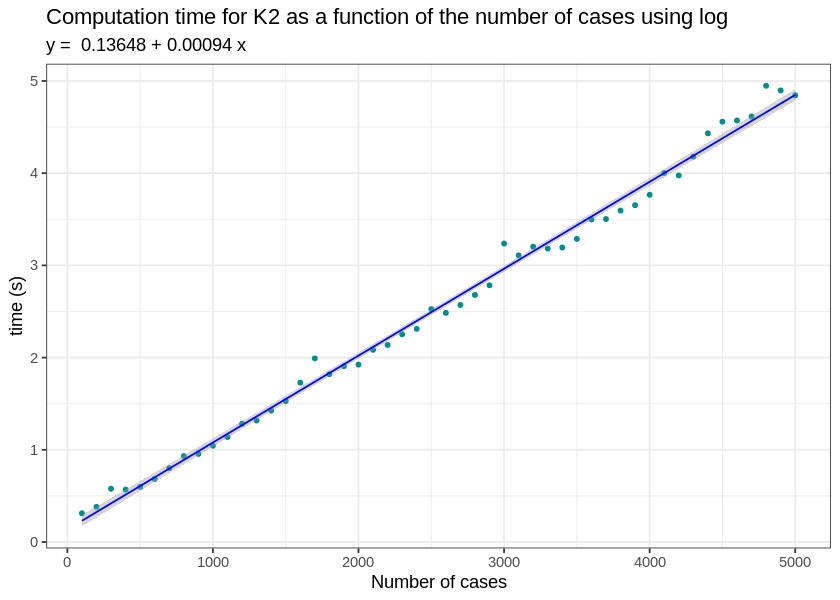

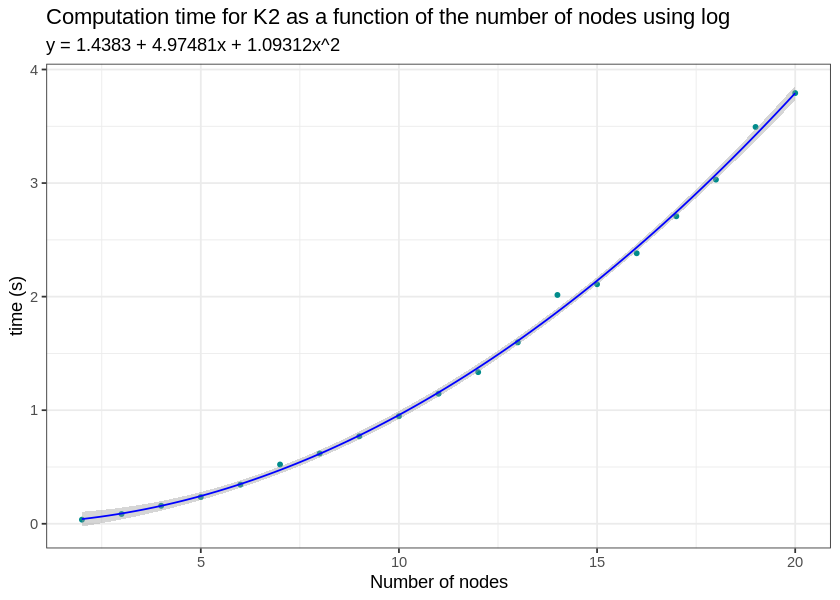

In [31]:
plot_data_nrows(data.child.imp)
plot_data_ncolumns(data.child.imp)

## BNlearn

In order to validate the results obtained in the previous sections, a built-in package like BNlearn can be used. K2 algorithm inside BNlearn is wrapped together with other hill-climbing greedy search algorithms, in the <code>hc</code> function. The score has to be set to the key value 'k2'. In general other scores are available and can give different results.

### Asia dataset

In [32]:
nodes <- c('Asia', 'Tub', 'Smoke', 'LungCan', 'Bronch', 'Either', 'X-ray', 'Dysp')
df.asia[] <- lapply(df.asia, factor)
colnames(df.asia) <- nodes
head(df.asia, 20)

Asia,Tub,Smoke,LungCan,Bronch,Either,X-ray,Dysp
2,2,1,1,1,2,1,2
2,1,1,1,1,1,2,1
1,1,2,1,1,1,2,1
2,1,2,1,1,1,2,1
2,1,2,1,1,1,1,2
2,1,2,1,1,1,2,2
2,1,2,1,1,1,2,2
2,1,2,1,1,1,1,2
2,1,2,1,1,1,1,2
2,1,2,1,1,1,2,1


In [33]:
bn.asia.k2 <- hc(df.asia, score='k2', maxp=2)
bn.asia.k2$arcs

from,to
Dysp,Smoke
Tub,Either
Either,X-ray
Bronch,Either
Smoke,Asia
Tub,Asia
Either,Smoke
Bronch,Dysp
LungCan,Bronch
Tub,Dysp


In [34]:
n <- length(nodes)
asia.bnlearn.net <- matrix(0, nrow=n, ncol=n) # matrix which contains the connections found in BNlearn
rownames(asia.bnlearn.net) <- nodes
colnames(asia.bnlearn.net) <- nodes
  
for (i in 1:nrow(bn.asia.k2$arcs)) {
  asia.bnlearn.net[bn.asia.k2$arcs[i,2], bn.asia.k2$arcs[i,1]] <- 1
}
    
asia.bnlearn.net

,Asia,Tub,Smoke,LungCan,Bronch,Either,X-ray,Dysp
Asia,0,1,1,0,0,0,0,0
Tub,0,0,0,0,0,0,0,0
Smoke,0,0,0,0,0,1,0,1
LungCan,0,0,0,0,0,0,0,0
Bronch,0,0,0,1,0,0,0,0
Either,0,1,0,0,1,0,0,0
X-ray,0,0,0,0,0,1,0,0
Dysp,0,1,0,0,1,0,0,0


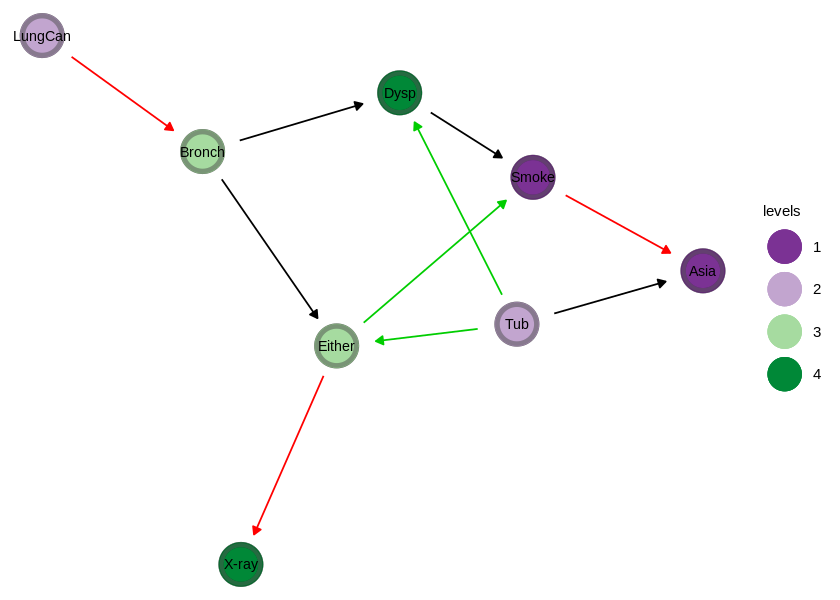

In [35]:
net<-as.network(t(asia.bnlearn.net))

level<-c(1,2,1,2,3,3,4,4)
edge_lev<-c(1,2,3)
net %v% "levels" = level
set.edge.attribute(net, "type",edge_lev)


set.seed(200)
ggnet2(net,color = "levels", palette = 'PRGn',edge.color = 'type',edge.size=0.5, arrow.gap = 0.06, arrow.size = 5, arrow.lty = 100)+
  geom_point(aes(color = color), size = 12, color = "black",alpha=0.7)+
  geom_point(aes(color = color), size = 12, alpha = 0.5)+
  geom_point(aes(color = color), size = 9)+
  geom_text(label=colnames(asia.bnlearn.net),color='black',size=3)

In [36]:
accuracy(asia.bnlearn.net, asia.real.net)

Number of correct edges: 3 
Number of missing edges: 5 
Number of added edges: 7 
Number of reversed edges: 1 
Accuracy: 0.2 


It can be seen how K2 inside BNlearn doesn't improve the prediction on the net respect to what obtained in the previous section. This might mean that the problem lies in the asia dataset itself, or at least in the one provided by <code>bnstruct</code>. It is known, in fact, that this dataset contains randomly generated items from the real ASIA net. It could be therefore some bad luck on this specific generation.

### Child dataset

In [37]:
nodes <- c('BA', 'DIS', 'AGE', 'LVH', 'DF', 'CM', 'LP', 'LF', 'S', 'HD',
           'HO2', 'CO2', 'CXR', 'G', 'LVHR', 'LBO2', 'RUQO2', 'CO2R', 'XRR', 'GR')
data.child.imp[] <- lapply(data.child.imp, factor)
colnames(data.child.imp) <- nodes
head(data.child.imp, 20)

BA,DIS,AGE,LVH,DF,CM,LP,LF,S,HD,HO2,CO2,CXR,G,LVHR,LBO2,RUQO2,CO2R,XRR,GR
2,3,3,2,1,3,1,1,2,1,1,1,1,2,2,2,3,2,1,2
2,4,2,1,1,2,1,2,2,1,2,1,2,2,1,2,2,1,2,2
2,3,1,2,1,3,1,2,2,1,2,2,2,2,2,1,2,1,2,2
2,4,1,1,1,3,1,1,2,1,3,1,1,2,1,3,1,1,1,2
2,2,1,2,2,4,1,1,1,1,3,1,1,2,2,1,1,1,2,2
2,2,1,2,1,4,1,3,2,1,3,1,3,2,2,2,1,1,3,2
2,2,1,2,2,4,1,3,2,1,3,1,1,2,2,1,1,1,1,2
2,1,1,2,3,1,1,1,2,2,2,1,4,2,2,1,1,1,4,2
2,3,2,2,1,3,1,2,2,1,2,1,2,2,2,1,1,1,2,2
2,4,1,1,1,3,1,2,2,1,3,3,2,2,1,1,1,2,2,2


In [38]:
bn.child.k2 <- hc(data.child.imp, score='k2', maxp=2)
bn.child.k2$arcs

from,to
CXR,XRR
CM,DIS
DIS,DF
LF,CXR
DIS,LF
LVH,LVHR
LP,CXR
DIS,LVH
CM,HO2
CO2,CO2R


In [39]:
n <- length(nodes)
child.bnlearn.net <- matrix(0, nrow=n, ncol=n) # matrix which contains the connections found in BNlearn
rownames(child.bnlearn.net) <- nodes
colnames(child.bnlearn.net) <- nodes
  
for (i in 1:nrow(bn.child.k2$arcs)) {
  child.bnlearn.net[bn.child.k2$arcs[i,2], bn.child.k2$arcs[i,1]] <- 1
}
    
child.bnlearn.net

,BA,DIS,AGE,LVH,DF,CM,LP,LF,S,HD,HO2,CO2,CXR,G,LVHR,LBO2,RUQO2,CO2R,XRR,GR
BA,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
DIS,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AGE,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LVH,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
DF,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
CM,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LP,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LF,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
S,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
HD,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


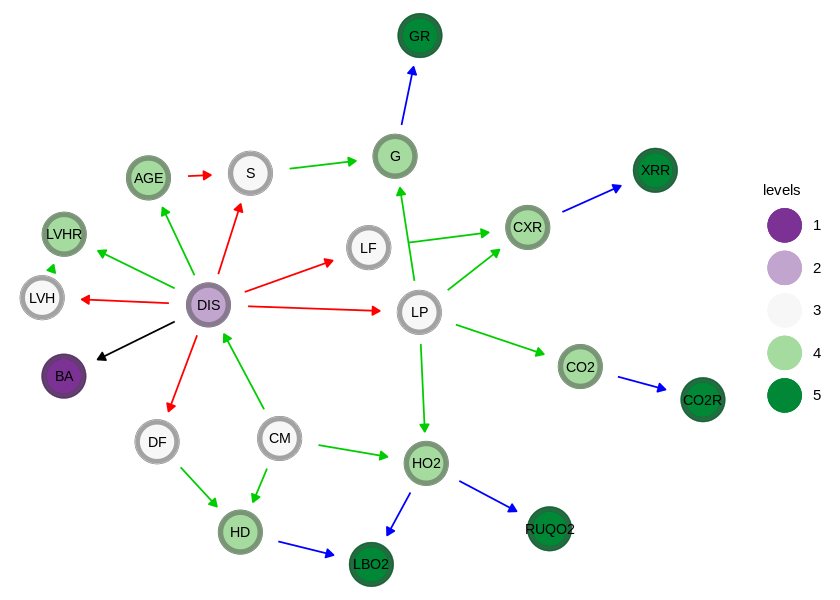

In [40]:
net<-as.network(t(child.bnlearn.net))

level <- c(1,2,4,3,3,3,3,3,3,4,4,4,4,4,4,5,5,5,5,5)
edge_lev<-c(1,3,3,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4)
net %v% "levels" = level
set.edge.attribute(net, "type",edge_lev)


set.seed(200)
ggnet2(net,color = "levels", palette = 'PRGn',edge.color = 'type',edge.size=0.5, arrow.gap = 0.06, arrow.size = 5, arrow.lty = 100)+
  geom_point(aes(color = color), size = 12, color = "black",alpha=0.7)+
  geom_point(aes(color = color), size = 12, alpha = 0.5)+
  geom_point(aes(color = color), size = 9)+
  geom_text(label=colnames(child.bnlearn.net),color='black',size=3)

In [41]:
accuracy(child.bnlearn.net, child.real.net)

Number of correct edges: 22 
Number of missing edges: 3 
Number of added edges: 4 
Number of reversed edges: 3 
Accuracy: 0.7586207 


Respect to the our k2 implementation, BNlearn algorithm performs poorly on child dataset. This is largly due to the reversal of 3 edges from the expected net.

## Instructions for BNstruct

The whole K2 method and its functions can be implemented inside the <code>bnstruct</code> package. The steps to follow are:

- Modify the <code>K2_algorithm</code> function in a way that can accept as input a BNDataset. Then extrapolate from it all the informations regarding nodes, data, etc. and build the standard dataframe from them. In this way no other changes in the computations are needed.
- Create a file which contains the functions <code>alpha</code>, <code>score_flag</code> and the new <code>K2_algorithm_bnstruct</code> that can be called k2.R. 
- Download from https://cran.r-project.org/src/contrib/ the bnstruct_1.0.12.tar.gz file, which can be unzipped as a bnstruct folder.
- Insert the k2.R file in the R directory of this folder
- In the NAMESPACE insert "*export(K2_algorithm_bnstruct)*"
- In AllGenerics.R file add "*setGeneric("K2_algorithm_bnstruct", function(BNdata, ...) { standardGeneric("K2_algorithm_bnstruct") } )*"

At this point the bnstruct folder is not yet ready because it needs to be built from R terminal. The commands to type are the following:

- *R CMD REMOVE bnstruct*, if there are previous installations
- *R CMD build --no-build-vignettes bnstruct*
- *R CMD INSTALL bnstruct_1.0.12.tar.gz*, the zip created in the build process

Finally, bnstruct package should be ready to be used and imported as usual.

In [42]:
BND <- BNDataset(data = data.ruiz,
                discreteness = rep('d', ncol(data.ruiz)),
                variables = names(data.ruiz),
                node.sizes = c(2,2,2),
                starts.from = 0)

adj <- K2_algorithm_bnstruct(BND, 3)

Node: x1 		 ------ Parents of node x1 are 	 p x1 = None 
Node: x2 		 ------ Parents of node x2 are 	 p x2 = x1 
Node: x3 		 ------ Parents of node x3 are 	 p x3 = x2 
Network score : -1.992

In [43]:
data.asia <- asia()
nodes <- c('Asia', 'Tub', 'Smoke', 'LungCan', 'Bronch', 'Either', 'X-ray', 'Dysp')
variables(data.asia) <- nodes
data.asia


Dataset: 

num.variables 8

variables
Asia Tub Smoke LungCan Bronch Either X-ray Dysp
discreteness
TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
node.sizes
2 2 2 2 2 2 2 2
num.items
10000
imputation
FALSE
has.boots
FALSE
has.imputed.boots
FALSE
num.boots
0

In [44]:
level <- c(1,2,1,2,3,3,4,4)
asia.bnstruct.net <- K2_algorithm_bnstruct(data.asia, 2, order = level)

Node: Asia 		 ------ Parents of node Asia are 	 p Asia = None 
Node: Tub 		 ------ Parents of node Tub are 	 p Tub = Asia 
Node: Smoke 		 ------ Parents of node Smoke are 	 p Smoke = None 
Node: LungCan 		 ------ Parents of node LungCan are 	 p LungCan = None 
Node: Bronch 		 ------ Parents of node Bronch are 	 p Bronch = LungCan 
Node: Either 		 ------ Parents of node Either are 	 p Either = LungCan Tub 
Node: X-ray 		 ------ Parents of node X-ray are 	 p X-ray = Either 
Node: Dysp 		 ------ Parents of node Dysp are 	 p Dysp = Either Smoke 
Network score : -2.356

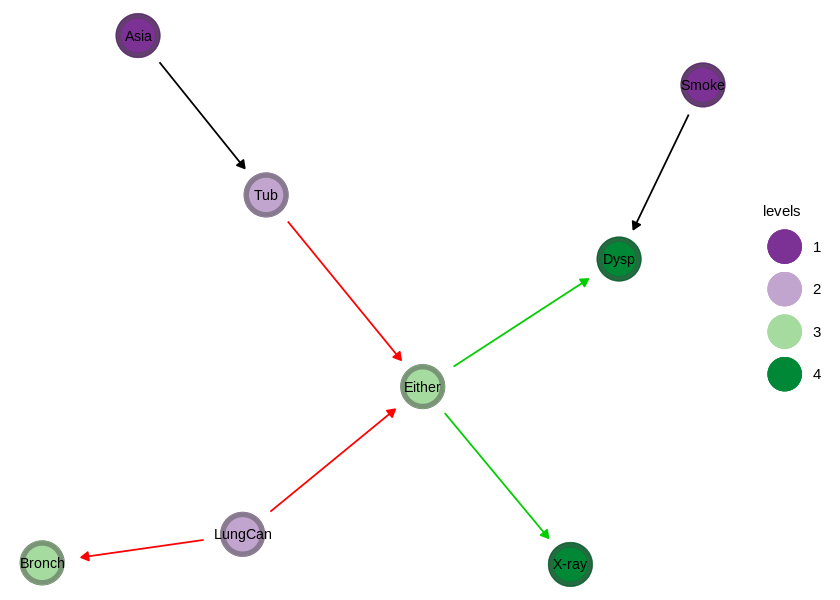

In [45]:
net<-as.network(t(asia.bnstruct.net))

level<-c(1,2,1,2,3,3,4,4)
edge_lev<-c(1,2,2,2,3,1,3)
net %v% "levels" = level
set.edge.attribute(net, "type",edge_lev)


set.seed(200)
ggnet2(net,color = "levels", palette = 'PRGn',edge.color = 'type',edge.size=0.5, arrow.gap = 0.06, arrow.size = 5, arrow.lty = 100)+
  geom_point(aes(color = color), size = 12, color = "black",alpha=0.7)+
  geom_point(aes(color = color), size = 12, alpha = 0.5)+
  geom_point(aes(color = color), size = 9)+
  geom_text(label=colnames(asia.bnstruct.net),color='black',size=3)

In [46]:
data.child <- child()
data.child <- bnstruct::impute(data.child)
names <- c('BA', 'DIS', 'AGE', 'LVH', 'DF', 'CM', 'LP', 'LF', 'S', 'HD',
           'HO2', 'CO2', 'CXR', 'G', 'LVHR', 'LBO2', 'RUQO2', 'CO2R', 'XRR', 'GR')
variables(data.child) <- names
data.child

bnstruct :: performing imputation ...
bnstruct :: imputation finished.



Dataset: 

num.variables 20

variables
BA DIS AGE LVH DF CM LP LF S HD HO2 CO2 CXR G LVHR LBO2 RUQO2 CO2R XRR GR
discreteness
TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
node.sizes
2 6 3 2 3 4 3 3 2 2 3 3 5 2 2 3 3 2 5 2
num.items
5000
imputation
TRUE
has.boots
FALSE
has.imputed.boots
FALSE
num.boots
0

In [47]:
level <-c(1,2,4,3,3,3,3,3,3,4,4,4,4,4,4,5,5,5,5,5)
child.bnstruct.net <- K2_algorithm_bnstruct(data.child, 2, order = level)

Node: BA 		 ------ Parents of node BA are 	 p BA = None 
Node: DIS 		 ------ Parents of node DIS are 	 p DIS = BA 
Node: AGE 		 ------ Parents of node AGE are 	 p AGE = S DIS 
Node: LVH 		 ------ Parents of node LVH are 	 p LVH = DIS 
Node: DF 		 ------ Parents of node DF are 	 p DF = DIS 
Node: CM 		 ------ Parents of node CM are 	 p CM = DIS 
Node: LP 		 ------ Parents of node LP are 	 p LP = DIS 
Node: LF 		 ------ Parents of node LF are 	 p LF = DIS 
Node: S 		 ------ Parents of node S are 	 p S = DIS 
Node: HD 		 ------ Parents of node HD are 	 p HD = CM DF 
Node: HO2 		 ------ Parents of node HO2 are 	 p HO2 = LP CM 
Node: CO2 		 ------ Parents of node CO2 are 	 p CO2 = LP 
Node: CXR 		 ------ Parents of node CXR are 	 p CXR = LP LF 
Node: G 		 ------ Parents of node G are 	 p G = S LP 
Node: LVHR 		 ------ Parents of node LVHR are 	 p LVHR = DIS LVH 
Node: LBO2 		 ------ Parents of node LBO2 are 	 p LBO2 = HD HO2 
Node: RUQO2 		 ------ Parents of node RUQO2 are 	 p RUQO2 = HO2 


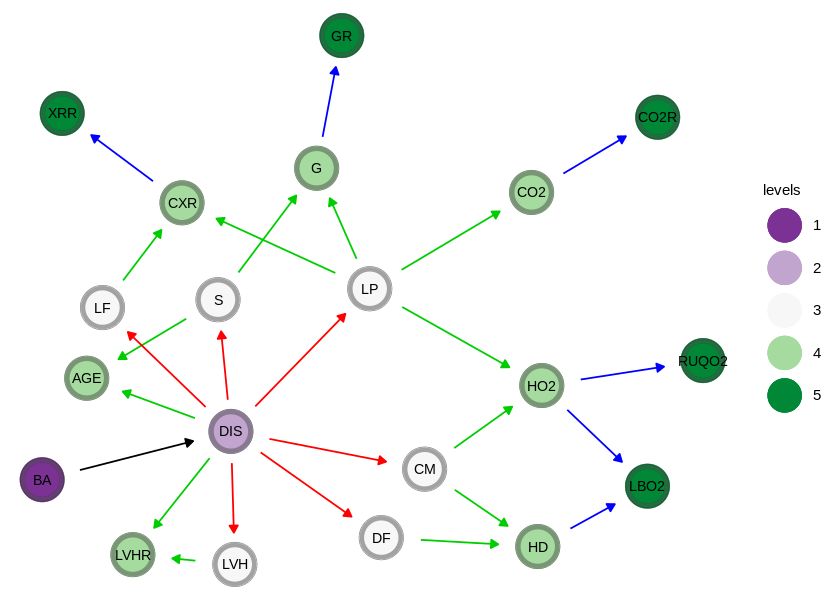

In [48]:
net<-as.network(t(child.bnstruct.net))

level <- c(1,2,4,3,3,3,3,3,3,4,4,4,4,4,4,5,5,5,5,5)
edge_lev<-c(1,3,3,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4)
net %v% "levels" = level
set.edge.attribute(net, "type",edge_lev)


set.seed(200)
ggnet2(net,color = "levels", palette = 'PRGn',edge.color = 'type',edge.size=0.5, arrow.gap = 0.06, arrow.size = 5, arrow.lty = 100)+
  geom_point(aes(color = color), size = 12, color = "black",alpha=0.7)+
  geom_point(aes(color = color), size = 12, alpha = 0.5)+
  geom_point(aes(color = color), size = 9)+
  geom_text(label=colnames(child.bnstruct.net),color='black',size=3)

As it can be observed, the results obtained through <code>bnstruct</code> library are exactly the same as the one obtained applying our <code>K2_algorithm</code> algorithm to the datasets.

## References

[**1**] G. F. Cooper and E. Herskovits, *A Bayesian Method for the Induction of Probabilistic Networks from Data*, Machine Learning 9, (1992) 309

[**2**] C. Ruiz, *Illustration of the K2 Algorithm for learning Bayes Net Structures*, http://web.cs.wpi.edu/~cs539/s11/Projects/k2_algorithm.pdf

[**3**] A. Franzin et al., *bnstruct: an R package for Bayesian Network structure learning in the presence of missing data*, Bioinformatics 33(8) (2017) 1250

[**4**] F. Sambo and A. Franzin, *bnstruct: an R package for Bayesian Network Structure Learning with missing data*, December 12, 2016

[**5**] https://cran.r-project.org/web/packages/bnstruct/vignettes/bnstruct.pdf